In [1]:
list_pattern=[]
list_time=[]
list_space=[]
import re
import numpy as np
import matplotlib.pyplot as plt
file='results_500_0.txt'
output_file='out_500_0_10.png'
distance=int(file.split('_')[1])


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
with open(file, 'r') as reader:
    
# Read and print the entire file line by line    
    for line in reader:
        if not line.startswith('Pattern'):
            line=line.replace('[','')
            line=line.replace(']','')
            line=line.split(',')
            str_pattern=''
            str_time=''
            str_space=''
            for el in range(0, len(line)-1):
                new_el=line[el].strip().replace("'",'')
                
                for i,field in enumerate(new_el.split('_')):
                    if i==0:
                        if str_pattern!='':
                            str_pattern+=','
                        str_pattern+=field
                    
                    elif i==1:
                        if str_time!='':
                            str_time+=','
                        str_time+=field[1]
                        
                    else:
                        if str_space!='':
                            str_space+=','
                        str_space+=field
            list_pattern.append(str_pattern)
            list_time.append(str_time)
            list_space.append(str_space)            

In [3]:
new_list_time=[]
for el in list_time:
    tmp_list=[]    
    item=el.split(',')
    for i in item:
        tmp_list.append(int(i))
    new_list_time.append(tmp_list)
#new_list_time=new_list_time
new_list_time=new_list_time[:10]

In [4]:
new_list_pattern=[]
for el in list_pattern:
    tmp_list=[]    
    item=el.split(',')
    for i in item:
        tmp_list.append(i)
    new_list_pattern.append(tmp_list)
#new_list_pattern=new_list_pattern
new_list_pattern=new_list_pattern[:10]

In [5]:
#plt.figure(figsize=(200,10))
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(polar=True)
# #plt.plot([1.0,1.5], [4,5], color='r', linestyle='-')
# theta = [1, 2, 2]
# r = [100, 200, 300]
# ax.plot(theta,r,"o")
# plt.show()

In [6]:
#new_list_pattern[:10]

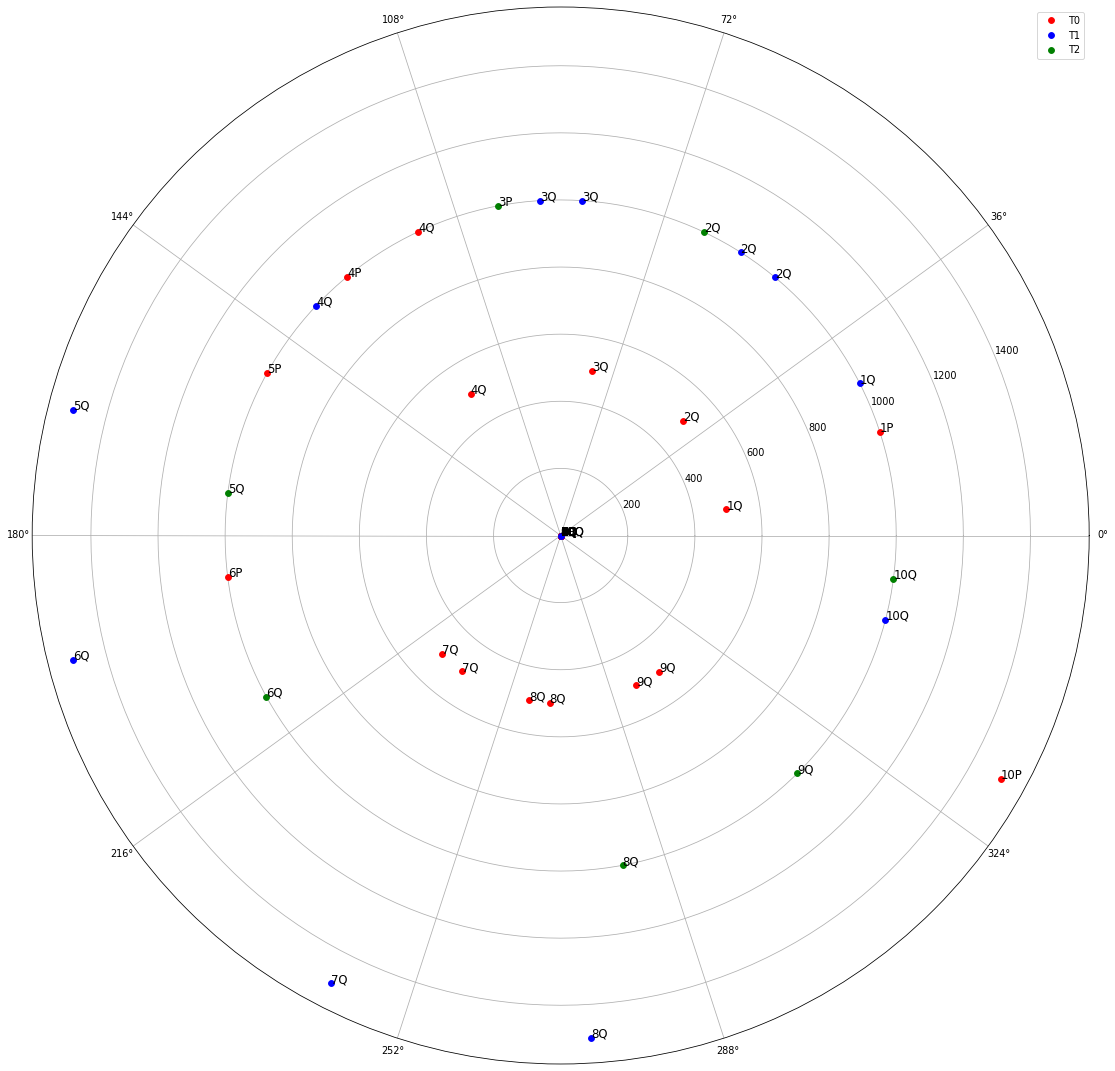

In [7]:
w = 20
h = 20
d = 70
fig = plt.figure(figsize=(w, h), dpi=d)
ax = fig.add_subplot(111, polar=True)

#theta = [1, 2, 2]
new_list_space = []
# for el in list_space[0].split(','):
#     th=int(el)
#     r.append(th*100)
    
for el in list_space:
    tmp_list=[]    
    item=el.split(',')
    for i in item:
        tmp_list.append(int(i)*distance)
    new_list_space.append(tmp_list)
#new_list_space=new_list_space
new_list_space=new_list_space[:10]
    
theta=[]
tot=len(new_list_pattern)
#print(tot)
for i, el in enumerate(new_list_pattern):
    tmp_li=[]
    for c,item in enumerate(el):  
        #(i+(c/len(el)))/3.14
        tmp_li.append(6.28*(i+c/len(el))/tot   )
    theta.append(tmp_li)

flag=False
flag2=False
flag3=False
for li,it in enumerate(new_list_pattern):
    x_tmp_points=[]
    y_tmp_points=[]
    for item in range(len(it)):
        #print(item)
        if new_list_time[li][item]==0:  
            if flag==False:
                ax.plot(theta[li][item], new_list_space[li][item], "o", color='r',label='T0')
                flag=True
            else:
                ax.plot(theta[li][item], new_list_space[li][item], "o", color='r')
#             label= 'T'+str(new_list_time[li][item])
            status=new_list_pattern[li][item][0]
            label=str(1+li)+status
            plt.text(theta[li][item], new_list_space[li][item],label, fontsize=12)
            x_tmp_points.append(theta[li][item])
            y_tmp_points.append(new_list_space[li][item])
        elif new_list_time[li][item]==1:
            if flag2==False:
                ax.plot(theta[li][item], new_list_space[li][item], "o", color='b',label='T1')
                flag2=True
            else:
                ax.plot(theta[li][item], new_list_space[li][item], "o", color='b')
            #label= 'T'+str(new_list_time[li][item])
            status=new_list_pattern[li][item][0]
            label=str(1+li)+status
            plt.text(theta[li][item], new_list_space[li][item],label, fontsize=12)
            x_tmp_points.append(theta[li][item])
            y_tmp_points.append(new_list_space[li][item])
        elif new_list_time[li][item]==2 :
            #print('ok')
            if flag3==False:
                ax.plot(theta[li][item], new_list_space[li][item], "o", color='g',label='T2')
                flag3=True
            else:
                ax.plot(theta[li][item], new_list_space[li][item], "o", color='g')
            #label= 'T'+str(new_list_time[li][item])
            status=new_list_pattern[li][item][0]
            label=str(1+li)+status
            plt.text(theta[li][item], new_list_space[li][item],label, fontsize=12)
            x_tmp_points.append(theta[li][item])
            y_tmp_points.append(new_list_space[li][item])
            
ax.set_xticks(np.arange(0,2.0*np.pi,np.pi/5.0))

plt.legend()
plt.savefig(output_file)